# **Practice 12: Kalman filter**
## **Goals for today**

---

During today practice we will:
* Learn covariance matrix
* Сonsider Kalman filter
* Recall discrete systems


## **Covariance**

In probability theory and statistics, **covariance** is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive.

$$
\textbf{cov}(X, Y) = E[(X-E[X])(Y-E[Y])]
$$
where $E[X]$ is the expected value of $X$, also known as the mean of $X$.

In [ ]:
import matplotlib.pyplot as plt
def scatter(x, y, title, xlabel='X', ylabel='Y', legend=[], xlim=[-1, 1], ylim=[-1, 1]):
  plt.scatter(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.3)
  plt.legend(legend)
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.show()

def plot_design(title='', xlabel='X', ylabel='Y', xlim=[], ylim=[]):
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.3)
  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)
  plt.show()

Covariance matrix:
[[0.06347471 0.00066209]
 [0.00066209 0.05823341]]


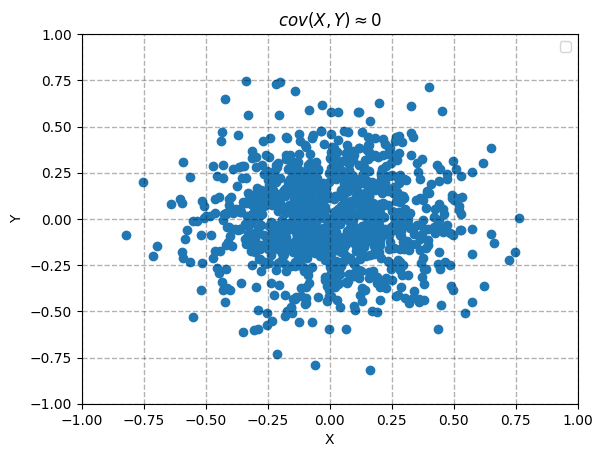

Covariance matrix:
[[0.06347471 0.06357757]
 [0.06357757 0.0734476 ]]


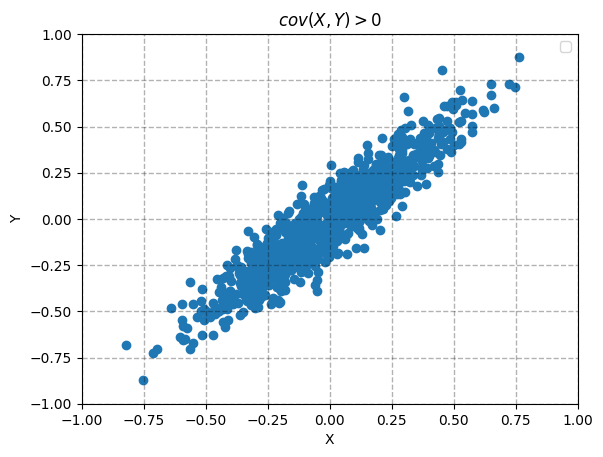

Covariance matrix:
[[ 0.06347471 -0.06273594]
 [-0.06273594  0.07183673]]


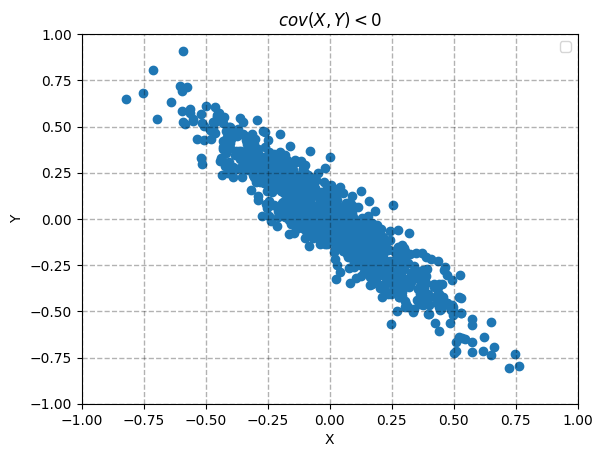

In [ ]:
import numpy as np


n = 1000
rng = np.random.default_rng()
X = rng.normal(0, 0.25, n)

Y = rng.normal(0, 0.25, n)
cov = np.cov(X, Y)
print("Covariance matrix:")
print(cov)
scatter(X, Y, title=r'$cov(X,Y) \approx 0$')

Y = X + rng.normal(0, 0.1, n)
cov = np.cov(X, Y)
print("Covariance matrix:")
print(cov)
scatter(X, Y, title=r'$cov(X,Y) > 0$')


Y = - X + rng.normal(0, 0.1, n)
cov = np.cov(X, Y)
print("Covariance matrix:")
print(cov)
scatter(X, Y, title=r'$cov(X,Y) < 0$')

## **Kalman Filter**

**Kalman filtering**, also **known as linear quadratic estimation** (LQE), is an algorithm that uses a series of measurements observed over time, including statistical noise and other inaccuracies, and produces estimates of unknown variables that tend to be more accurate than those based on a single measurement alone, by estimating a joint probability distribution over the variables for each timeframe.

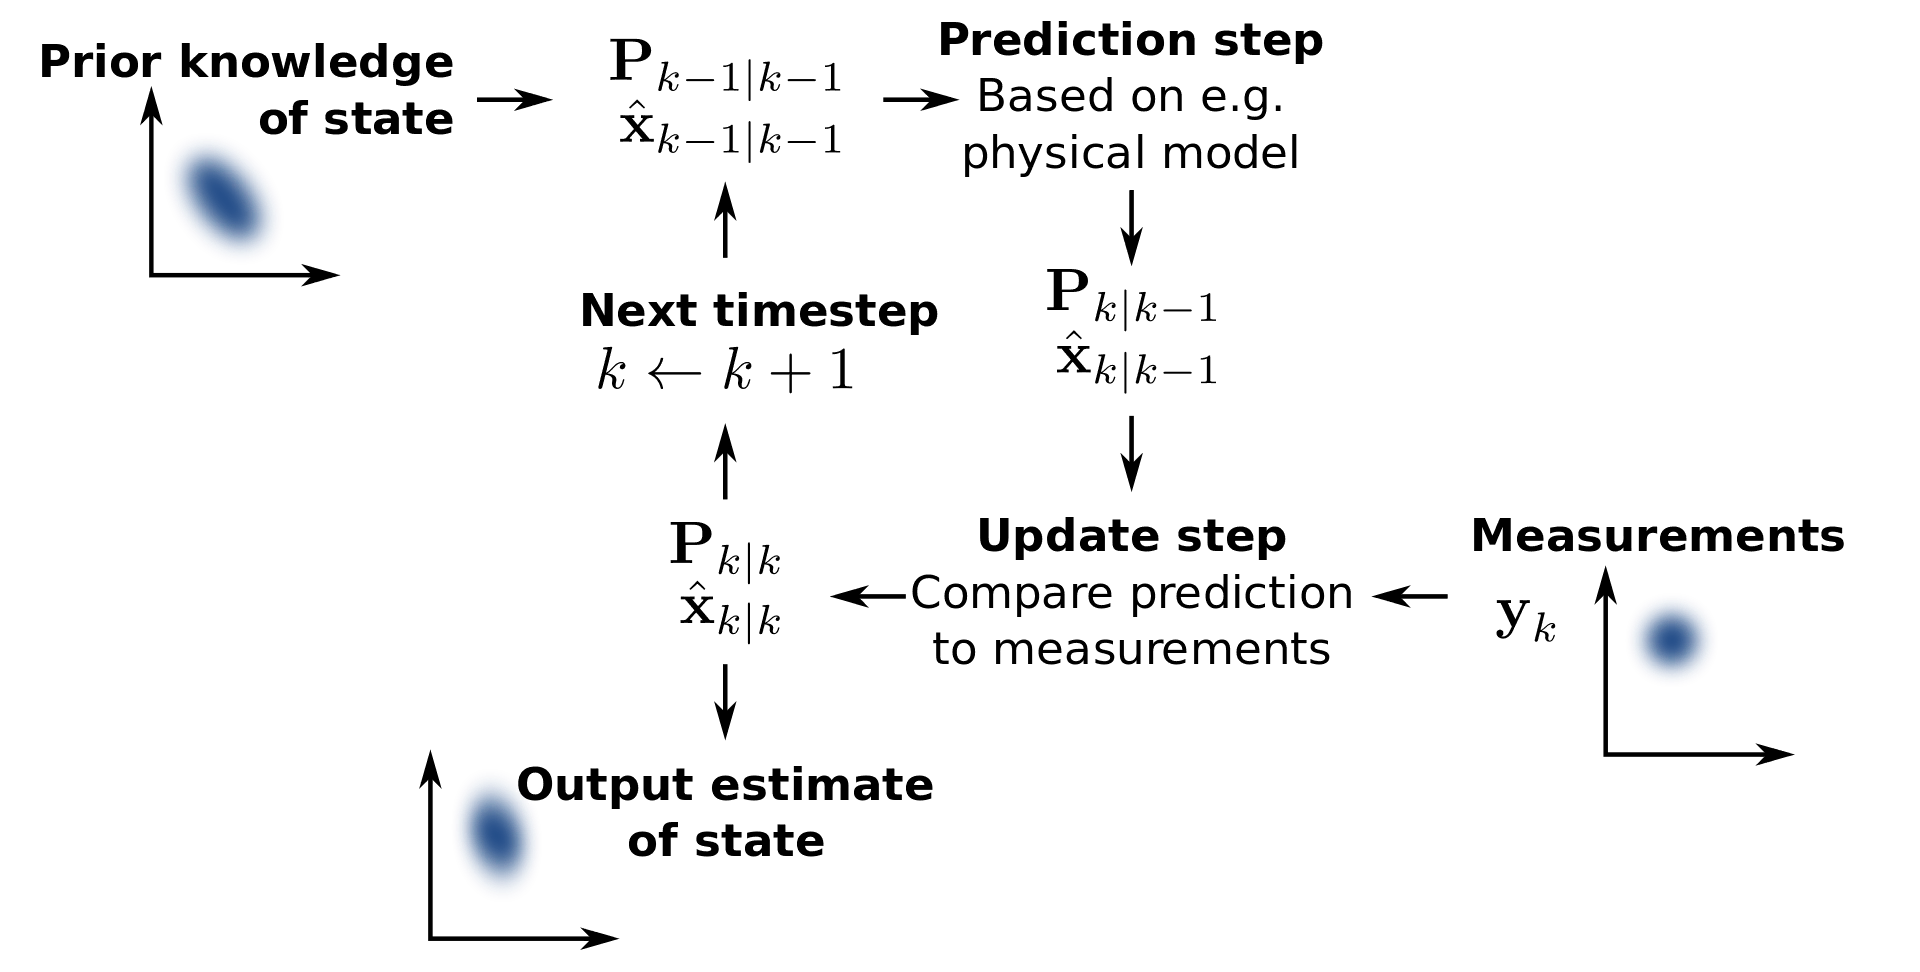

### **Dynamic system**

The Kalman filter works with discrete dynamic systems

\begin{equation}
\begin{cases}
\mathbf{x} [(k+1)T] = \mathbf{A_dx} [kT] + \mathbf{B_du} [kT]\\
\mathbf{y} [kT] = \mathbf{C_dx} [kT]
\end{cases}
\end{equation}

where
*   $T$ - time step in seconds
*   $k$ - sampling step
*   $\mathbf{x} [(k+1)T]$ - system state vector in the future
*   $\mathbf{x} [kT]$ - current system state vector
*   $\mathbf{y} [kT]$ - current output vector
*   $\mathbf{u} [kT]$ - control inputs
*   $\mathbf{A_d}$ - discrete state matrix
*   $\mathbf{B_d}$ - discrete input matrix
*   $\mathbf{C_d}$ - discrete output matrix

To simplify notation, let us rewrite the system of equations in the following form:
\begin{equation}
\begin{cases}
\mathbf{x}_{k+1} = \mathbf{A_dx}_k + \mathbf{B_du}_k\\
\mathbf{y}_k = \mathbf{C_dx}_k
\end{cases}
\end{equation}
> **NOTE:** Discrete matrices are related to continious time matrices by the following expressions
>
> $\mathbf{A_d} = I+T\mathbf{A}$
>
> $\mathbf{B_d} = T\mathbf{B}$
>
> $\mathbf{C_d} = T\mathbf{C}$

Let's add the parameters $\textbf{w}_k$ and $\textbf{v}_k$ to describe the random processes inside the dynamical system:
\begin{equation}
\begin{cases}
\mathbf{x}_{k+1} = \mathbf{A_dx}_k + \mathbf{B_du}_k + \textbf{w}_k\\
\mathbf{y}_k = \mathbf{C_dx}_k + \textbf{v}_k
\end{cases}
\end{equation}

where
* $\textbf{w}_k$ is the process noise, which is assumed to be drawn from a zero mean multivariate normal distribution $\mathcal {N}$, with covariance $\textbf{Q}$
* $\textbf{v}_k$ is the observation noise, which is assumed to be zero mean Gaussian white noise with covariance $\textbf{R}$

### **Kalman filter details**
The Kalman filter is a recursive estimator. This means that only the estimated state from the previous time step and the current measurement are needed to compute the estimate for the current state. In contrast to batch estimation techniques, no history of observations and/or estimates is required.

The state of the filter is represented by two variables:
* $\mathbf{\hat{x}}_{k|k}$ the a posteriori state estimate mean at time k given observations up to and including at time k
* $\mathbf{P}_{k|k}$ the a posteriori estimate covariance matrix (a measure of the estimated accuracy of the state estimate)


### **Kalman filter algorithm**
**Predict:**
1. Predicted (a priori) state estimate:
$$
\mathbf{\hat{x}}_{k|k-1} = \mathbf{A_d\hat{x}}_{k-1|k-1} + \mathbf{B_du}_k
$$
2. Predicted (a priori) estimate covariance:
$$
\mathbf{\hat{P}}_{k|k-1} = \mathbf{A_d}\mathbf{P}_{k-1|k-1}\mathbf{A_d}^T + \mathbf{Q}
$$


**Update:**
1. Innovation or measurement pre-fit residual:
$$
\mathbf{e}_k = \textbf{y}_k - \mathbf{C_d \hat{x}}_{k|k-1}
$$
2. Innovation (or pre-fit residual) covariance:
$$
\mathbf{S}_k = \mathbf{C_d}\mathbf{\hat{P}}_{k|k-1}\mathbf{C_d}^T + \mathbf{R}
$$
3. Optimal Kalman gain:
$$
\mathbf{K}_k = \mathbf{\hat{P}}_{k|k-1}\mathbf{C_d}^T\mathbf{S}_k^{-1}
$$
4. Updated (a posteriori) state estimate:
$$
\mathbf{\hat{x}}_{k|k} = \mathbf{\hat{x}}_{k|k-1} + \mathbf{K}_k\mathbf{e}_k
$$
5. Updated (a posteriori) estimate covariance:
$$
\mathbf{P}_{k|k} = (\mathbf{I} - \mathbf{K}_k\mathbf{C_d})\mathbf{\hat{P}}_{k|k-1}
$$
6. Measurement post-fit residual:
$$
\mathbf{e}_{k|k} = \textbf{y}_k - \mathbf{C_d \hat{x}}_{k|k}
$$

### **How to understand that the Kalman filter parameters are correct**
If the model is accurate, and the values for $\hat{\mathbf {x}}_{0|0}$ and $\mathbf{P}$ accurately reflect the distribution of the initial state values, then the following invariants are preserved:
$$
E[\mathbf{x}_k - \hat{\mathbf {x}}_{k|k}] = E[\mathbf{x}_k - \hat{\mathbf {x}}_{k|k-1}]
$$

$$
E[\mathbf{e}_{k|k}] = 0
$$

## **Excercise: Truck on frictionless rails**
Consider a truck on frictionless, straight rails. Initially, the truck is stationary at position 0, but it is buffeted this way and that by random uncontrolled forces. We measure the position of the truck every $T$ seconds, but these measurements are imprecise; we want to maintain a model of the truck's position and velocity.

The position and velocity of the truck are described by the linear state space
$$
\mathbf{x}_k = \begin{bmatrix}
x_k\\
v_k
\end{bmatrix}
$$

We assume that between the $(k − 1)$ and $k$ timestep, uncontrolled forces cause a constant acceleration of $\mathbf{u}_k=a_k$ that is normally distributed with mean 0 and standard deviation $σ$. From Newton's laws of motion we conclude that:

\begin{equation}
\begin{cases}
x_k = x_{k-1} + v_{k-1}T + \frac{1}{2}a_{k-1}T^2 \\
v_k = v_{k-1}+a{k-1}T
\end{cases}
\end{equation}

These equations can be rewritten as:
\begin{equation}
\mathbf{x}_k = \begin{bmatrix}
1 & T\\
0 & 1
\end{bmatrix}
\mathbf{x}_{k-1} + \begin{bmatrix}
\frac{T^2}{2}\\
T
\end{bmatrix}\mathbf{u}_{k-1}
\end{equation}

In [ ]:
def Truck_position(T, t_max, x0 = np.array([[0], [0]])):
  t = np.arange(0, t_max, T)
  n = len(t)
  u = 1 + rng.normal(0.1, 0.25, n)

  A = np.array([[1, T],
                [0, 1]])
  B = np.array([[0.5 * T**2],
                [T]])
  C = np.array([[1, 0]])

  x, y = [], []
  for i in range(n):
    x_k = A @ x0 + B * u[i]
    y_k = C @ x_k + rng.normal(0, 0.1, 1)
    x.append([x_k[0, 0], x_k[1, 0]])
    y.append(y_k[0])
    x0 = x_k

  x = np.array(x)
  y = np.array(y)
  return t, y, u, x

In this case we can find matrices $\mathbf{Q}$ and $\mathbf{R}$ by the following way:
$$
\mathbf{Q} = E[\mathbf{w}_k\mathbf{w}_k^T]=\mathbf{B_d}\mathbf{B_d}^T\sigma
$$

$$
\mathbf{R} = E[\mathbf{v}_k\mathbf{v}_k^T]=\sigma_{sensor}
$$

We know the initial starting state of the truck with perfect precision, so we initialize:
$$
\mathbf{\hat{x}}_{0|0} = \begin{bmatrix}
0\\
0
\end{bmatrix}
$$
and to tell the filter that we know the exact position and velocity, we give it a zero covariance matrix:
$$
\mathbf{P}_{0|0} = \begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}
$$

If the initial position and velocity are not known perfectly, the covariance matrix should be initialized with suitable variances on its diagonal:
$$
\mathbf{P}_{0|0} = \begin{bmatrix}
\sigma_x & 0\\
0 & \sigma_v
\end{bmatrix}
$$
The filter will then prefer the information from the first measurements over the information already in the model.

> **Task description**
>
> Write the Kalman filter algorithm and complete the plots by estimation state from your algorithm

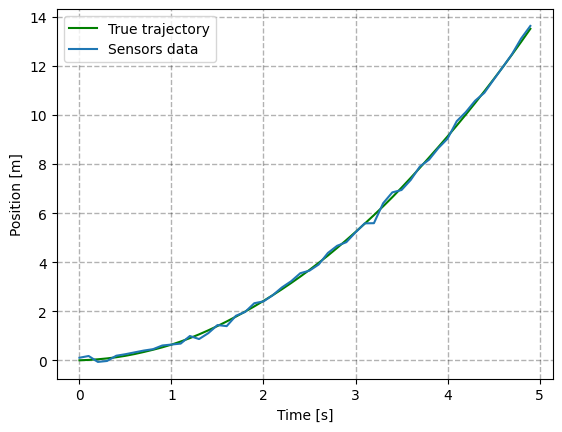

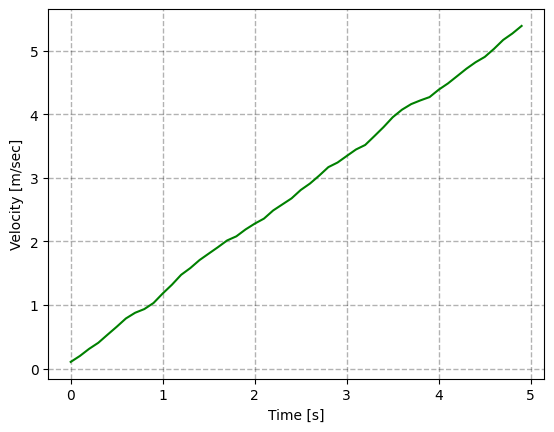

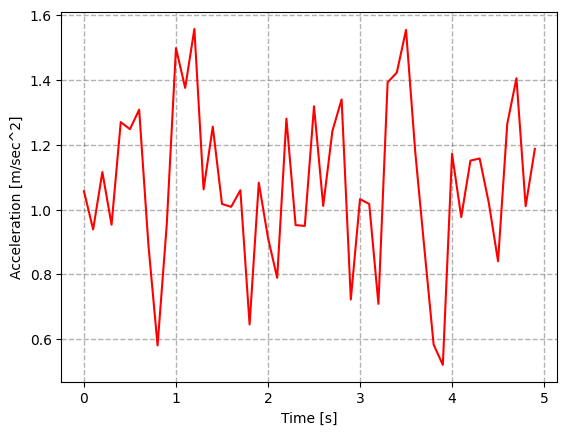

In [ ]:
T = 0.1
t_max = 5
t, y, u, x_real = Truck_position(T, t_max)

# put your code here

plt.plot(t, x_real[:, 0], color = 'g', label='True trajectory')
plt.plot(t, y, label='Sensors data')
plt.legend()
plot_design(xlabel = "Time [s]", ylabel='Position [m]')

plt.plot(t, x_real[:, 1], 'g', label='True trajectory')
plot_design(xlabel = "Time [s]", ylabel='Velocity [m/sec]')

plt.plot(t, u, 'r')
plot_design(xlabel = "Time [s]", ylabel='Acceleration [m/sec^2]')

## **Excercise: Mass-spring-damper**
> **Task description:**
>
> Simulate a mass-spring-damper system with parameters $m = 1$, $b = 2$, $k = 10$. Assume that the system has only a coordinate measurement sensor and the control signal is given by an external forcing force. Add a sinusoidal signal with noise to the control. Add noise to the coordinate measurement sensor.
>
> Implement a Kalman filter for the system you obtained. Construct plots similar to the previous task.
>
> Ask additional questions if there are any system parameters that you don't know.

In [ ]:
# put your code here